# Smart Classroom Data Evaluation

## Informationen zur Analyse

### Klassenzimmer "Primarklasse_OG1" / Schulklasse 4a

--- Markdown ---

Stundenplan: <br/><br/>
<img src='Studenplan 4a Oben.png' width=500px height=auto>

### Klassenzimmer "Primarklasse_EG" / Schulklasse 5a

--- Markdown ---

Stundenplan: <br/><br/>
<img src='Stundenplan 5a.png' width=500px height=auto>

### Klassenzimmer "oberstufe" / Verschiedene Klassen

--- Markdown ---

Stundenplan: <br/> <br/>
<img src='Oberstufe.png' width=500px height=auto>

## Setup

### Imports

In [3]:
import psycopg2
import configparser
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Settings

In [4]:
plt.rcParams['timezone'] = "CET"

### Setup connection

In [5]:
def read_config(filename = 'config.ini'):
    config = configparser.ConfigParser()
    config.read(filename)

    db_hostname = config['DATABASE']['HOSTNAME']
    db_database = config['DATABASE']['DATABASE']
    db_username = config['DATABASE']['USERNAME']
    db_password = config['DATABASE']['PASSWORD']

    return db_hostname, db_database, db_username, db_password

In [6]:
def get_connection():
    db_hostname, db_database, db_username, db_password = read_config()
    return  psycopg2.connect(
        host     = db_hostname,
        database = db_database,
        user     = db_username,
        password = db_password)

### Define function for querying measurements

In [7]:
# get all Classrooms from database and filter them
def get_measurement(name, startDate, endDate):
    con = get_connection()

    sql_stations = f"""
        set timezone = 'CET'; 
        select * from api_classroom
        inner join api_measurementstation on api_classroom.id = api_measurementstation.fk_classroom_id
        inner join api_measurement on api_measurementstation.id = api_measurement.fk_measurement_station_id
        where api_classroom.name = '{name}' and time BETWEEN '{startDate}' AND '{endDate}';
    """    
    result = pd.read_sql_query(sql_stations, con)
    
    result["time"]        = result["time"].dt.tz_convert("CET")
    result["updated_on"]  = result["updated_on"].dt.tz_convert("CET")
    result["insert_time"] = result["insert_time"].dt.tz_convert("CET")
    
    con.close()
    return result

In [8]:
def get_entrance(name, startDate, endDate):
    con = get_connection()

    sql_stations = f"""
        set timezone = 'CET'; 
        select * from api_classroom
        inner join api_measurementstation on api_classroom.id = api_measurementstation.fk_classroom_id
        inner join api_entranceevent on api_measurementstation.id = api_entranceevent.fk_measurement_station_id
        where time BETWEEN '{startDate}' AND '{endDate}' and api_classroom.name = '{name}';
    """    
    result = pd.read_sql_query(sql_stations, con)
    
    result["time"]        = result["time"].dt.tz_convert("CET")
    result["updated_on"]  = result["updated_on"].dt.tz_convert("CET")
    result["insert_time"] = result["insert_time"].dt.tz_convert("CET")
    
    con.close()
    people_count = 0
        
    return result

get_entrance('oberstufe', '2022-05-05', '2022-05-06')

,id,name,description,room_number,updated_on,id,active,name,fk_classroom_id,id,time,change,insert_time,fk_measurement_station_id
0,54,oberstufe,Klassenzimmer Oberstufe,1,2022-05-04 20:13:31.995376+02:00,6,True,Station_Oberstufe_EntranceEvents,54,31214,2022-05-05 01:50:43.941605+02:00,-1,2022-05-05 01:50:44.113179+02:00,6
1,54,oberstufe,Klassenzimmer Oberstufe,1,2022-05-04 20:13:31.995376+02:00,6,True,Station_Oberstufe_EntranceEvents,54,31213,2022-05-05 01:46:05.815731+02:00,-1,2022-05-05 01:46:06.003712+02:00,6
2,54,oberstufe,Klassenzimmer Oberstufe,1,2022-05-04 20:13:31.995376+02:00,6,True,Station_Oberstufe_EntranceEvents,54,31212,2022-05-05 01:43:38.720822+02:00,1,2022-05-05 01:43:38.918308+02:00,6
3,54,oberstufe,Klassenzimmer Oberstufe,1,2022-05-04 20:13:31.995376+02:00,6,True,Station_Oberstufe_EntranceEvents,54,31209,2022-05-05 01:32:30.394308+02:00,-1,2022-05-05 01:32:30.599159+02:00,6
4,54,oberstufe,Klassenzimmer Oberstufe,1,2022-05-04 20:13:31.995376+02:00,6,True,Station_Oberstufe_EntranceEvents,54,31208,2022-05-05 01:21:22.432429+02:00,-1,2022-05-05 01:21:22.609218+02:00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,54,oberstufe,Klassenzimmer Oberstufe,1,2022-05-04 20:13:31.995376+02:00,6,True,Station_Oberstufe_EntranceEvents,54,31223,2022-05-05 02:17:04.006494+02:00,-1,2022-05-05 02:17:04.194537+02:00,6
1032,54,oberstufe,Klassenzimmer Oberstufe,1,2022-05-04 20:13:31.995376+02:00,6,True,Station_Oberstufe_EntranceEvents,54,31221,2022-05-05 02:09:22.905766+02:00,-1,2022-05-05 02:09:23.053555+02:00,6
1033,54,oberstufe,Klassenzimmer Oberstufe,1,2022-05-04 20:13:31.995376+02:00,6,True,Station_Oberstufe_EntranceEvents,54,31220,2022-05-05 02:08:46.987160+02:00,-1,2022-05-05 02:08:47.155962+02:00,6
1034,54,oberstufe,Klassenzimmer Oberstufe,1,2022-05-04 20:13:31.995376+02:00,6,True,Station_Oberstufe_EntranceEvents,54,31218,2022-05-05 02:05:55.234140+02:00,1,2022-05-05 02:05:55.388144+02:00,6


In [9]:
def get_people_count_overtime(entrance_list):
    people_count     = 0
    lst_people_count = []
    lst_time         = []
    array = []
    
    for index, row in entrance_list.iterrows():
        people_count += row['change']
        ttime = row['time']
        lst_people_count.append(people_count)
        lst_time.append(ttime) 
        
        d = dict({'people_count': people_count, 'time': ttime})
        array.append(d)
    return pd.DataFrame.from_dict(array,orient='columns')
    

## Evaluation

### Forschungsfragen

#### Wie ist der Zusammenhang zwischen Luftqualität und Frequenz bzw. Dauer des Lüftens?

--- Markdown ---

##### Beispiel 1

In [10]:
data = get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-03 08:00:00", endDate = "2022-05-03 09:30:00")

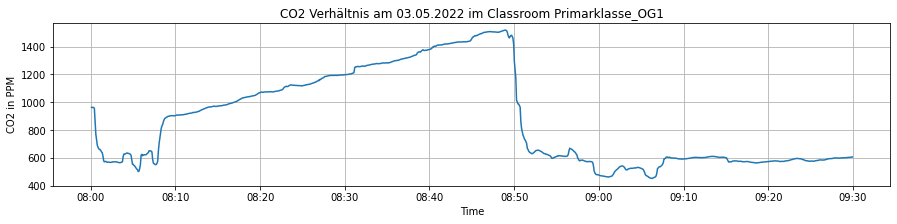

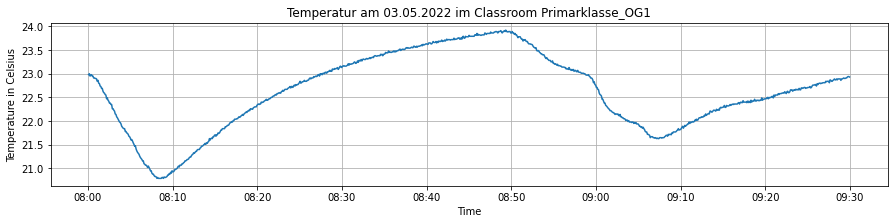

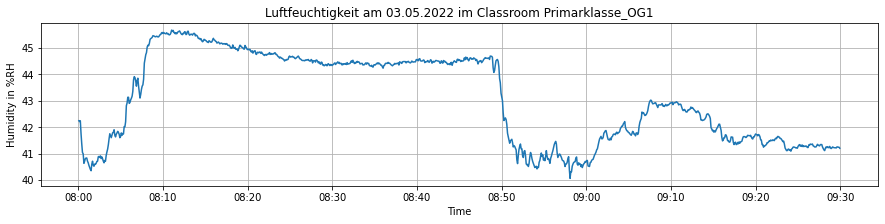

In [11]:
plt.figure(figsize = (15,3))
plt.plot(data["time"], data["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 03.05.2022 im Classroom Primarklasse_OG1")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["time"], data["temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature in Celsius")
plt.title("Temperatur am 03.05.2022 im Classroom Primarklasse_OG1")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["time"], data["humidity"])
plt.xlabel("Time")
plt.ylabel("Humidity in %RH")
plt.title("Luftfeuchtigkeit am 03.05.2022 im Classroom Primarklasse_OG1")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

##### Beispiel 2

In [12]:
data = get_measurement("Primarklasse_EG", startDate = "2022-05-03 08:00:00", endDate = "2022-05-03 09:30:00")

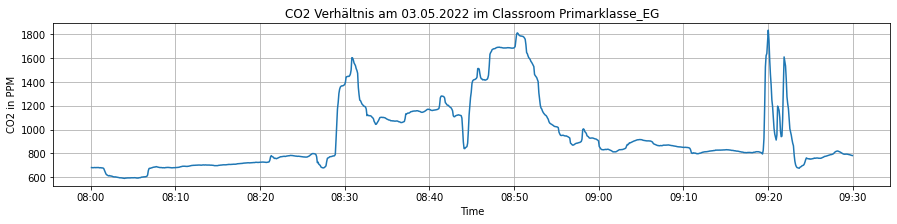

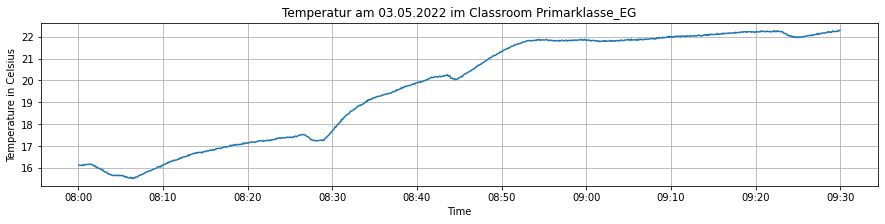

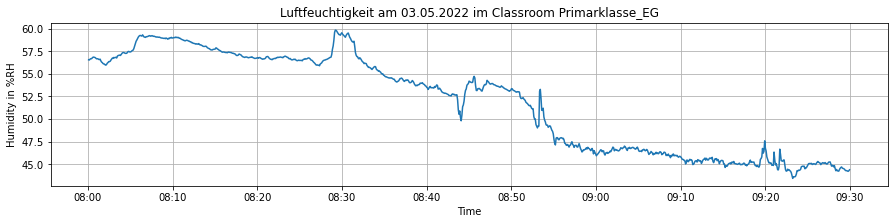

In [13]:
plt.figure(figsize = (15,3))
plt.plot(data["time"], data["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 03.05.2022 im Classroom Primarklasse_EG")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["time"], data["temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature in Celsius")
plt.title("Temperatur am 03.05.2022 im Classroom Primarklasse_EG")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["time"], data["humidity"])
plt.xlabel("Time")
plt.ylabel("Humidity in %RH")
plt.title("Luftfeuchtigkeit am 03.05.2022 im Classroom Primarklasse_EG")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

##### Beispiel 3

In [14]:
data = get_measurement("oberstufe", startDate = "2022-05-03 08:00:00", endDate = "2022-05-03 09:30:00")

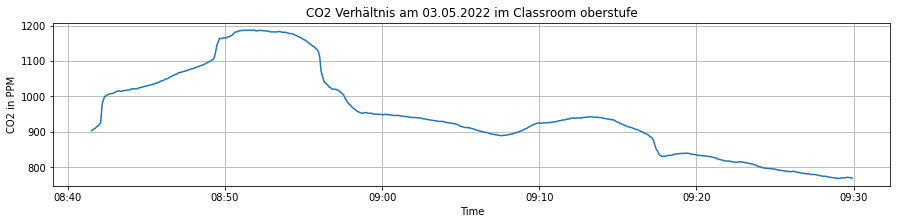

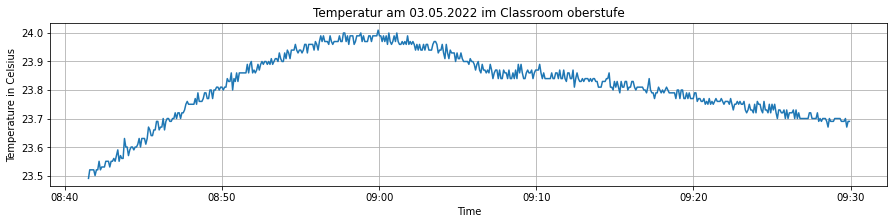

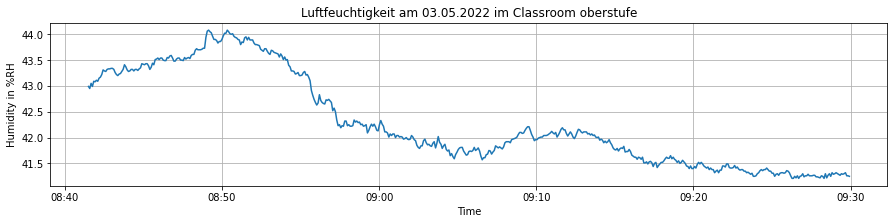

In [15]:
plt.figure(figsize = (15,3))
plt.plot(data["time"], data["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 03.05.2022 im Classroom oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["time"], data["temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature in Celsius")
plt.title("Temperatur am 03.05.2022 im Classroom oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["time"], data["humidity"])
plt.xlabel("Time")
plt.ylabel("Humidity in %RH")
plt.title("Luftfeuchtigkeit am 03.05.2022 im Classroom oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

#### Lässt sich anhand der Luftqualität etwas über die Anzahl Personen im Raum aussagen?

--- Markdown ---
#### Oberstufe Zeit / Personen im Raum

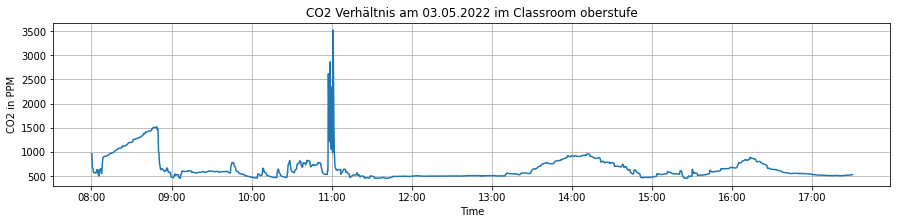

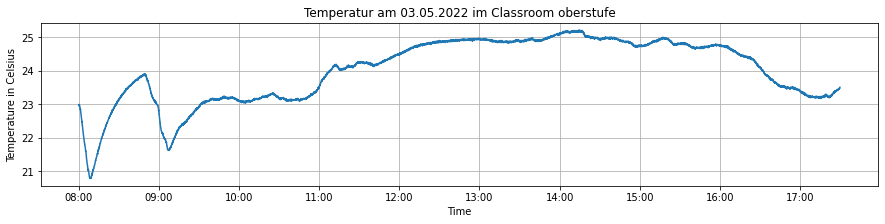

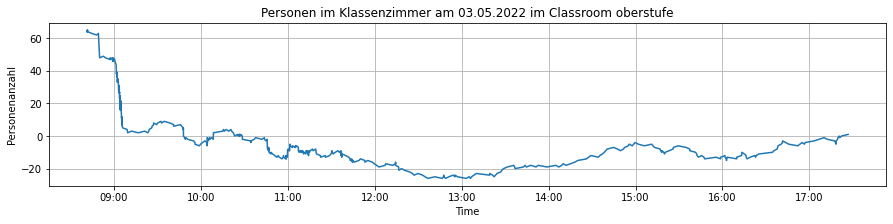

,id,id,fk_classroom_id,id,co2,temperature,humidity,fk_measurement_station_id,light
count,6705.0,6705.0,6705.0,6.705000e+03,6703.000000,6702.000000,6703.000000,6705.0,6702.000000
mean,1.0,1.0,1.0,1.017056e+06,654.448605,24.013327,39.365523,1.0,46461.168606
std,0.0,0.0,0.0,5.776285e+03,239.888820,0.953390,2.991689,0.0,46.010866
min,1.0,1.0,1.0,1.007474e+06,452.000000,20.790000,31.420000,1.0,46288.000000
25%,1.0,1.0,1.0,1.012015e+06,507.000000,23.220000,38.460000,1.0,46432.000000
50%,1.0,1.0,1.0,1.017035e+06,567.000000,24.240000,39.710000,1.0,46464.000000
75%,1.0,1.0,1.0,1.022064e+06,729.500000,24.880000,41.020000,1.0,46496.000000
max,1.0,1.0,1.0,1.027094e+06,3520.000000,25.220000,51.380000,1.0,46592.000000


In [16]:
df_people = get_people_count_overtime(get_entrance('oberstufe', startDate = "2022-05-03 08:00:00", endDate = "2022-05-03 17:30:00"))
data = get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-03 08:00:00", endDate = "2022-05-03 17:30:00")



plt.figure(figsize = (15,3))
plt.plot(data["time"], data["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 03.05.2022 im Classroom oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["time"], data["temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature in Celsius")
plt.title("Temperatur am 03.05.2022 im Classroom oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()


plt.figure(figsize = (15,3))
plt.plot(df_people["time"], df_people["people_count"])
plt.xlabel("Time")
plt.ylabel("Personenanzahl")
plt.title("Personen im Klassenzimmer am 03.05.2022 im Classroom oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

data.describe()


#### Lässt sich aus den Messdaten der optimale Zeitpunkt zum Lüften (laufend) ermitteln?

--- Markdown ---

In [109]:
# psdeudo:
# Select time, max(co2) from Primarklasse_OG1 where time > '2020-05-03 08:00:00' and time < '2020-05-03 17:30:00'
# Select time, min(Co2) from Primarklasse_OG1 where in between (time_from 30 min before previous querry) and (time_to previous query)
Monday_05_02 = get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-02 08:00:00", endDate = "2022-05-02 18:30:00")
Tuesday_05_03 = get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-03 08:00:00", endDate = "2022-05-03 18:30:00")
Wendsday_05_04 = get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-04 08:00:00", endDate = "2022-05-04 18:30:00")
Thursday_05_05 = get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-05 08:00:00", endDate = "2022-05-05 18:30:00")
Firday_05_06 = get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-06 08:00:00", endDate = "2022-05-06 18:30:00")

column = Monday_05_02["co2"]

print(Monday_05_02['co2'].max())

max_entry_m = Monday_05_02.query(f"co2 == {Monday_05_02['co2'].max()}")
max_entry_t = Tuesday_05_03.query(f"co2 == {Tuesday_05_03['co2'].max()}")
max_entry_w =Wendsday_05_04.query(f"co2 == {Wendsday_05_04['co2'].max()}")
max_entry_t =Thursday_05_05.query(f"co2 == {Thursday_05_05['co2'].max()}")
max_entry_f =Firday_05_06.query(f"co2 == {Firday_05_06['co2'].max()}")
print(max_entry_m['time'].values[0])
     

1011.0
2022-05-02T12:59:45.540150000


#### Welche weiteren Erkenntnisse lassen sich aus den erfassten Messdaten ableiten?

--- Markdown ---

In [27]:
# Strom sparen, wie kann möglichst viel Co2 eingesparrt werden, jedoch möglichst wenig Tempatur gesenkt werden
con = get_connection()
sql_stations = f"""
    SELECT * from smartclassroom_dev.public.api_measurement where name = 'Primarklasse_OG1'
"""    
pd.read_sql_query(sql_stations, con)


DatabaseError: Execution failed on sql '
    SELECT * from smartclassroom_dev.public.api_measurement where name = 'Primarklasse_OG1'
': column "name" does not exist
LINE 2: ...m smartclassroom_dev.public.api_measurement where name = 'Pr...
                                                             ^
HINT:  Perhaps you meant to reference the column "api_measurement.time".


#### Welche Erkenntnisse von Dritten können Sie allenfalls bestätigen/widerlegen?

--- Markdown ---